In [1]:

#Time series data is a collection of observations obtained through repeated measurements over time.It also referred to as 
#time-stamped data,is a sequence of data points indexed in time order.
#Time series analysis is a statistical technique that deals with time series data, or trend analysis.Time series data means
#that data is in a series of particular time periods or intervals.
# Goals: identifying nature of phenomenon and forecasting
# Use Cases: Financial Analysis,Weather analysis,network data analysis and healthcare analysis
# why does stationarity matter: 1. most time series models assume that each point is independent of one another  
# 2. The statistical properties of data should not change over time.
# 3. Stationarity helps us better identify the driving factors
# environments and tools for this algo: numpy,pandas,matplotlib,datetime,statsmodels
#Time Series: series of data points listed in time order
#Common: Equally spaced points in time
#Examples: Temperature during the day, pollution during year,
# no. of taxis rides during week and so on
#Trend: Long term progression (eg. increase or decrease)
#Seasonality: Seasonal Patterns due to seasonal factors

# You can make series stationary by:

1.Differencing the Series (once or more)
2.Take the log of the series
3.Take the nth root of the series
4.Combination of the above



import pandas as pd
fname='AirPassengers.csv'
data=pd.read_csv(fname)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
# to check null 
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [3]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
data['Month']=pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [6]:
# now it is converted to datetime object and it is easy for us to work rather than on strings
data['Month'].dt.year.head()

0    1949
1    1949
2    1949
3    1949
4    1949
Name: Month, dtype: int64

In [7]:
data=data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

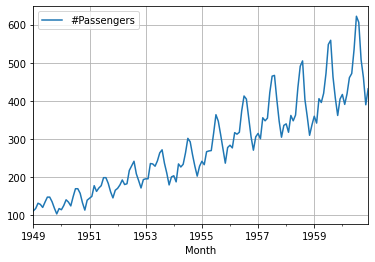

In [8]:
%matplotlib inline
data.plot(grid='on')

<AxesSubplot:xlabel='Month'>

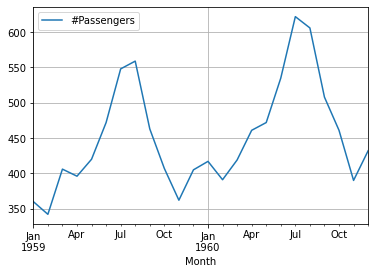

In [9]:
# peak is there during festive season or during vacations but in winters it goes down
from datetime import datetime
start_date=datetime(1959,1,1)
end_date=datetime(1960,12,1)
data[(start_date<=data.index) & (data.index <= end_date)].plot(grid='on')

In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

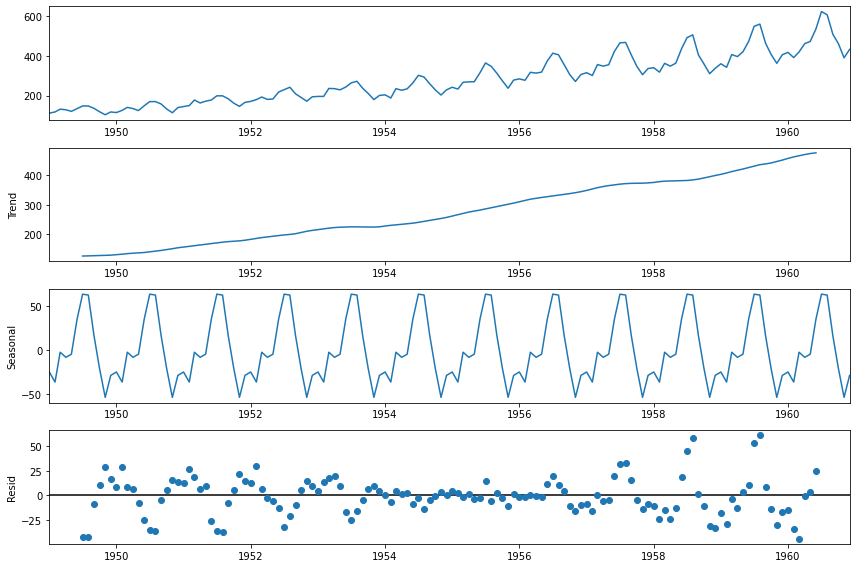

In [11]:
# TIME SERIES DECOMPOSITION
#ADDITIVE MODEL
#Y(t)=Trend(t)+Seasonality(t)+Residual(t)
# Residual means difference between expected and observed
# tsa package has seasonal_decompose function
# the trend is increasing somewhat and  there are seasonal variations in it
#Additive model analysis is a newly emerged approach for time-series modeling. ... Under this setting,
#the given time-series would be decomposed into four components: trend, seasonality, cyclic patterns, 
#and a random component. The formula is as follows: 𝑦(𝑡)=𝑔(𝑡)+𝑠(𝑡)+ℎ(𝑡)+ϵ(𝑡).
# In additive model,components of additive model are simply added together
# In multiplicative model ,same components are multiplied together
#If the seasonality and residual components are independent of the trend, then you have an additive series. 
#If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a 
#multiplicative series.
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(data,model='additive')
fig=decomposition.plot()

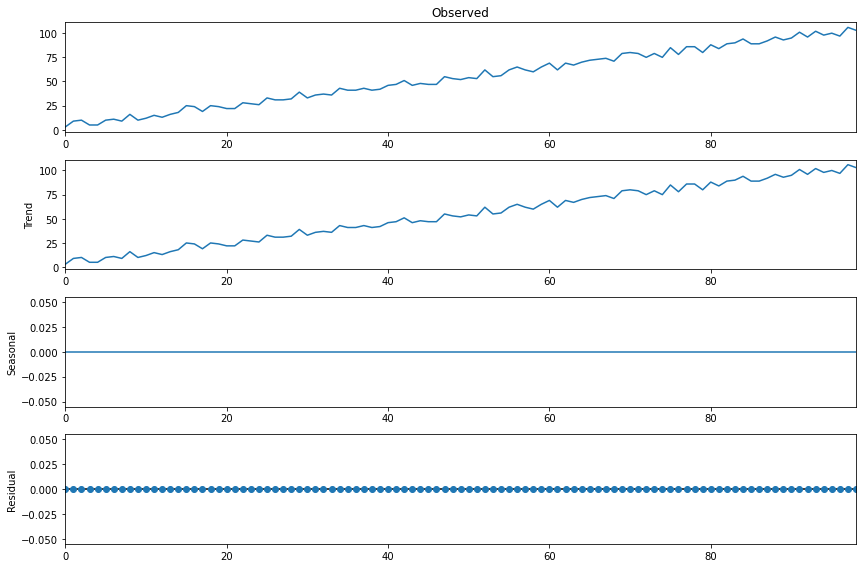

In [13]:


#Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

#Decomposition provides a useful abstract model for thinking about time series generally and for better understanding 
#problems during time series analysis and forecasting.

#The time series decomposition method of analysis and how it can help with forecasting.
#How to automatically decompose time series data in Python.
#How to decompose additive and multiplicative time series problems and plot the results.

#Time Series Components

#Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
#Non-Systematic: Components of the time series that cannot be directly modeled.
#A given time series is thought to consist of three systematic components including level, trend, seasonality, 
#and one non-systematic component called noise.

#These components are defined as follows:

#Level: The average value in the series.
#Trend: The increasing or decreasing value in the series.
#Seasonality: The repeating short-term cycle in the series.
#Noise: The random variation in the series.

#It is helpful to think of the components as combining either additively or multiplicatively.

#Additive Model
#y(t) = Level + Trend + Seasonality + Noise
#An additive model is linear where changes over time are consistently made by the same amount.

#A linear trend is a straight line.

#A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

#Multiplicative Model

#y(t) = Level * Trend * Seasonality * Noise

#A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

#A nonlinear trend is a curved line.

#A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

#Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models
#on your problem.
#from statsmodels.tsa.seasonal import seasonal_decompose
#series = ...
#result = seasonal_decompose(series, model='additive')
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

#These four time series can be plotted directly from the result object by calling the plot() function. For example:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from matplotlib import pyplot
#series = ...
#result = seasonal_decompose(series, model='additive')
#result.plot()
#pyplot.show()





# Additive Decomposition
#We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an
#additive model.
# period=1 trend or which value
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
df = [i+randrange(10) for i in range(1,100)]
df
result = seasonal_decompose(df, model='additive', period=1)
result.plot()
pyplot.show()

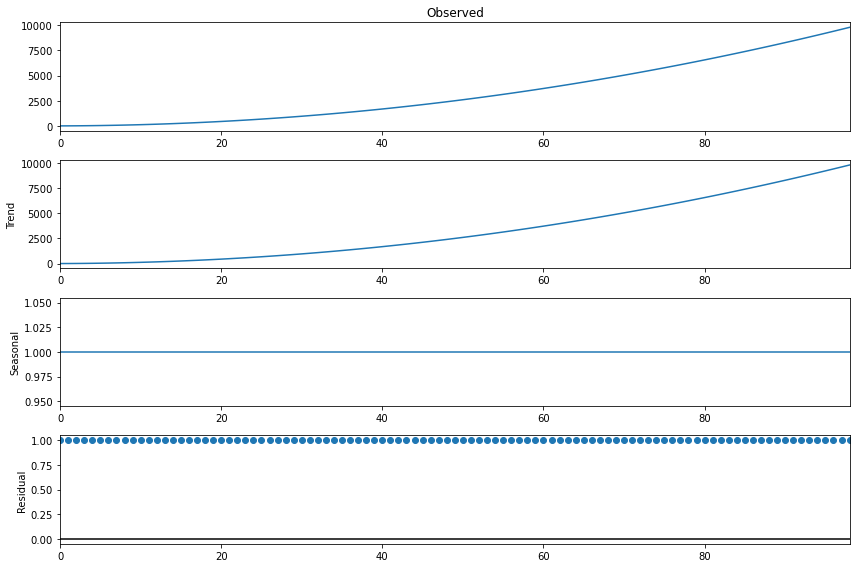

In [14]:
# Multiplicative Decomposition
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
df = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(df, model='multiplicative', period=1)
result.plot()
pyplot.show()

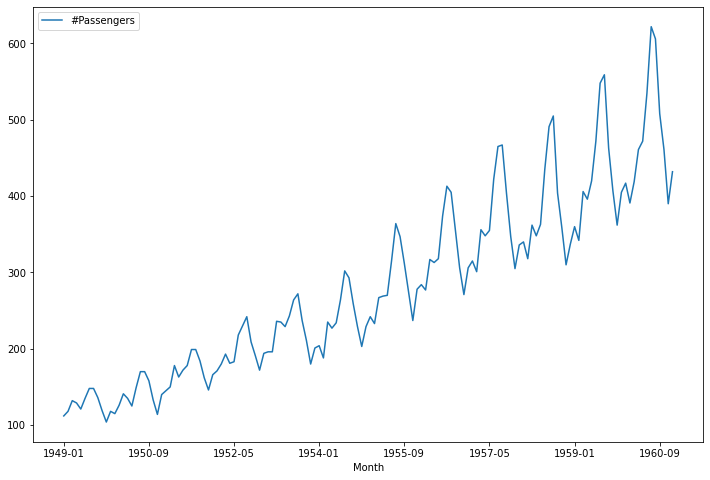

In [15]:
from pandas import read_csv
from matplotlib import pyplot
df = read_csv('AirPassengers.csv', header=0, index_col=0)
df.sort_index(inplace=True)
df.plot()
pyplot.show()

In [16]:

#will use holt winter model because it is powerful despite its simplicity
#holt winter model is used when data has trend and seasonality but no randomness
#holt winter components: Level  ,Trend   and Seasonality
#Models will be additive or multiplicative
# Additive when magnitude of seasonal patterns will remain constant with time
#Multiplicative when seasonal variations increase or decrease with time

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [17]:
# READ DATE COLUMN AS DATE TIME DATATYPE
df=pd.read_csv('dailysales.csv',parse_dates=['date'])

In [32]:
df.info()  # date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [18]:
df.head()

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0


In [19]:
# No missing value

df.isnull().sum()

date     0
sales    0
dtype: int64

In [20]:
# data structure required for Time Series
#aggregating on dates
# converting date columns as index
df=df.groupby('date').sum()

In [36]:
df.head(10)

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0
2018-01-06,385.0
2018-01-07,492.0
2018-01-08,473.0
2018-01-09,249.0


In [21]:
# monthly aggregate,rule and aggregation parameter
# A means year end, MS means month start, M means month end,W means weekly,D means daily
#aggregating daily sales to monthly sales
df=df.resample(rule='M').sum()

In [22]:
df.head(10)

,sales
date,
2018-01-31,9035.0
2018-02-28,9571.0
2018-03-31,13143.0
2018-04-30,12427.0
2018-05-31,8133.0
2018-06-30,7437.0
2018-07-31,11758.0
2018-08-31,9992.0
2018-09-30,7216.0


<AxesSubplot:xlabel='date'>

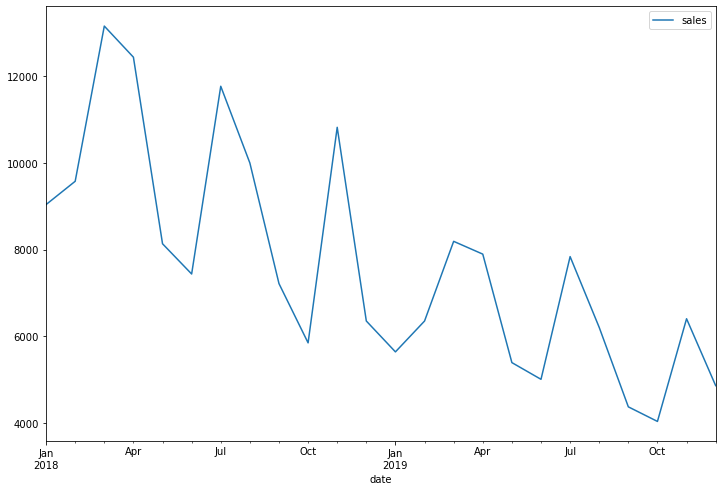

In [42]:
df.plot()

C:\Users\profn\AppData\Local\Temp/ipykernel_15200/2776968786.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model='additive',freq=4).plot()


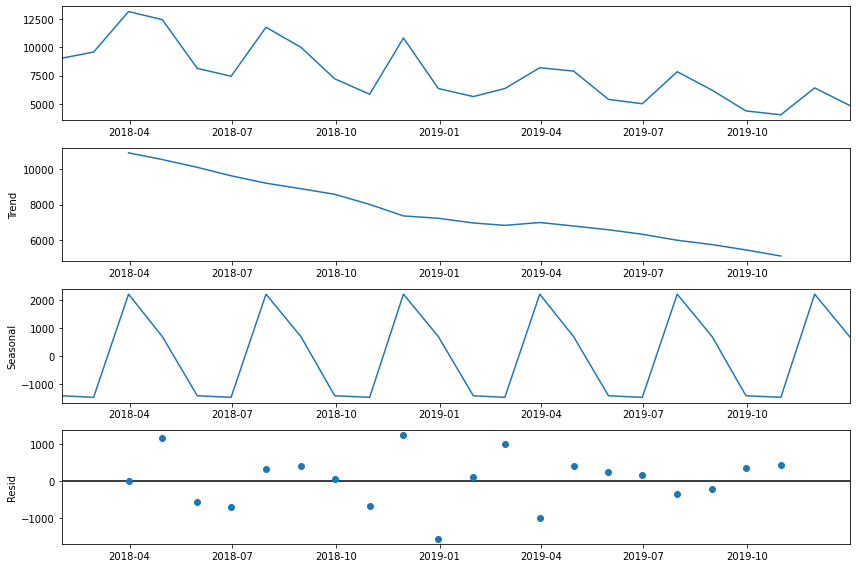

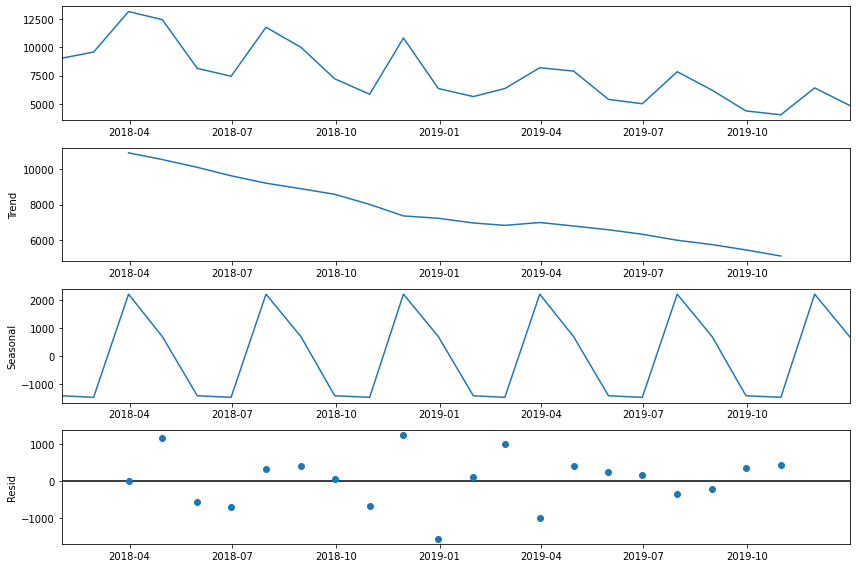

In [23]:
# freq=4 means it is a quarterly frequency
# graph shows strong seasonality and downward trend
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df,model='additive',freq=4).plot()

In [24]:
# Train test Split
train=df[:21]  # till july 07
test=df[19:]   # from aug

In [25]:
train.tail()

,sales
date,
2019-05-31,5397.40
2019-06-30,5012.80
2019-07-31,7837.30
2019-08-31,6207.00
2019-09-30,4379.25


In [26]:
# HOLT WINTER MODEL
# unable to find which to use add or mul ,try all possible combinations and use which is best
# model based on train data
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.sales,trend='add',seasonal='mul',seasonal_periods=4).fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [27]:
#predicting 5 months after july in training
test_pred=hwmodel.forecast(5)
test_pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2019-10-31    4302.195842
2019-11-30    6414.404254
2019-12-31    5249.444943
2020-01-31    3697.324616
2020-02-29    3482.988165
Freq: M, dtype: float64

<AxesSubplot:xlabel='date'>

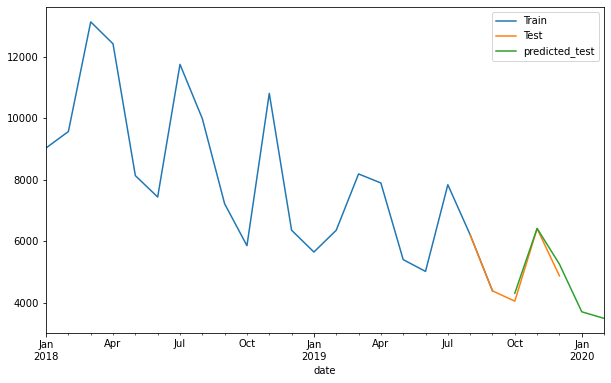

In [28]:
# in first line we r plotting actual values of train data
# orange is actual and green is predicted
train['sales'].plot(legend=True,label='Train',figsize=(10,6))
test['sales'].plot(legend=True,label='Test')
test_pred.plot(legend=True,label='predicted_test')

In [29]:
# MODEL EVALUATION
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
#lower the mean indicates (predicted values are very close to actual one)

np.sqrt(mean_squared_error(test,test_pred))

1922.6443282712391

In [31]:
df.sales.mean(),np.sqrt(df.sales.var())

(7665.204166666666, 2549.757117414906)

In [32]:
# FINAL MODEL
#model based on entire data and predict for next 4 months
final_model=ExponentialSmoothing(df.sales,trend='add',seasonal='mul',seasonal_periods=4).fit()
pred=final_model.forecast(4)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [123]:
pred

2020-01-31    3460.767694
2020-02-29    3197.175759
2020-03-31    4708.327369
2020-04-30    3698.580292
Freq: M, dtype: float64

In [33]:


import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv('GlobalLandTemperaturesByState.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [35]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [36]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [37]:
df.shape

(645675, 5)

In [38]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [39]:
# remove rows with null values
df=df.dropna(how='any',axis=0)


In [40]:
df.shape

(620027, 5)

In [41]:
# rename column names to shorter names
df.rename(columns={'dt':'Date','AverageTemperature':'Avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)

In [43]:
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [44]:
# convert Date as index column but first change it into datetime
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [45]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [46]:
# create 'Year' column in a dateset
df['Year']=df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [47]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [48]:
# lets take range from 1982 to 2013
# in year col above min value is 1743 and max value is 2013
latest_df=df.loc['1980':'2013']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [49]:
# take avg temp based on countries ,highest in canda and lowest in brazil
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


In [50]:
resample_df=latest_df[['Avg_temp']].resample('A').mean()

In [51]:
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


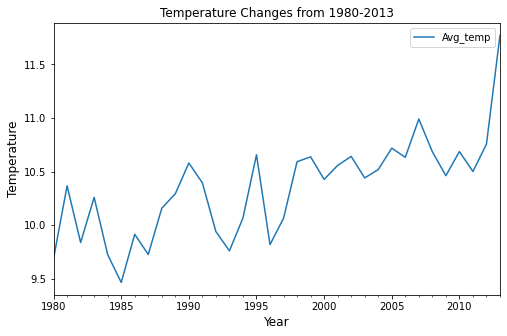

In [52]:
resample_df.plot(title='Temperature Changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [53]:
decomp=seasonal_decompose(resample_df,freq=3)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

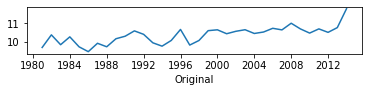

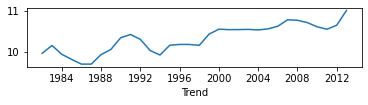

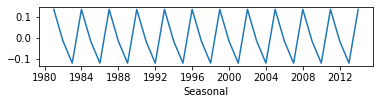

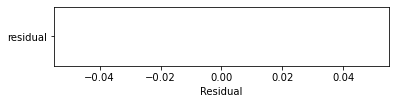

<Figure size 432x360 with 0 Axes>

In [54]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot('residual')
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()


In [55]:

import pandas as pd

In [57]:
df=pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


In [58]:
# Q3 assign it to variable apple
apple=df
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [59]:
# Q4 check out the type of the columns
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [60]:
# Q5 Transform the Date column as a datetime type
apple['Date']=pd.to_datetime(apple.Date,infer_datetime_format=True)

In [61]:
# Q6 Set the date as the index
apple.set_index('Date',inplace=True)

In [62]:
# Q7 is there any duplicate dates?
apple.index.nunique()

184

In [63]:
#Q8 oops it seems the index is from the recent date.Make the first entry the oldest date
apple.sort_index(axis='index',inplace=True)

In [64]:
# Q9 get the last business day of each month
lbd=apple.resample('M').last()
lbd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-31,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
2014-11-30,116.849998,119.750000,116.620003,118.930000,112.124863,181873900
2014-12-31,113.790001,114.769997,107.349998,109.330002,103.074181,152088400
2015-01-31,113.739998,120.000000,109.029999,117.160004,110.456146,465842700
2015-02-28,130.020004,133.600006,126.610001,128.460007,121.587555,368216200
2015-03-31,124.050003,126.489998,123.099998,125.320000,118.615524,162031800
2015-04-30,132.309998,134.539993,124.580002,128.949997,122.051315,420972300
2015-05-31,132.600006,132.910004,129.119995,130.279999,123.825241,198148600


In [65]:
# Q10 what is difference in days between the first day and the oldest
apple.index[0]-apple.index[-1]

Timedelta('-1277 days +00:00:00')

In [66]:
#Q 11 how many months in the data we have
lbd.shape

(43, 6)

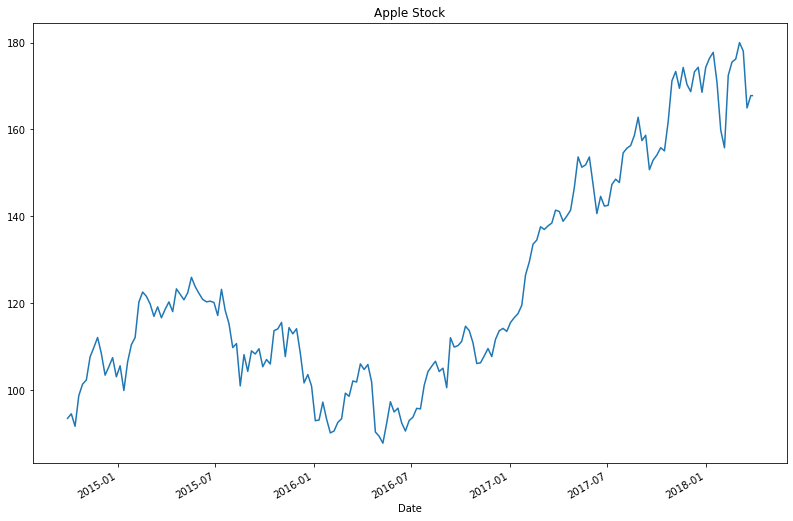

In [67]:
# Q12 plot the 'Adj CLose' value .Set the size of the figure to 13.5x9 inches
# make th eplot and assign it to variable
appl_open=apple['Adj Close'].plot(title="Apple Stock")

# changes the size of graph
fig=appl_open.get_figure()
fig.set_size_inches(13.5,9)

In [68]:

import pandas as pd
df=pd.read_csv("AAPL.csv",parse_dates=["Date"],index_col="Date")
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [69]:
df.index

DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05', '2018-03-12', '2018-03-19',
               '2018-03-26', '2018-03-29'],
              dtype='datetime64[ns]', name='Date', length=184, freq=None)

In [70]:
# retrieve Jan 2017 stock prices
df["2017-01"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,115.800003,118.160004,114.760002,117.910004,115.572708,103845500
2017-01-09,117.949997,119.930000,117.940002,119.040001,116.680298,138810700
2017-01-16,118.339996,120.500000,118.220001,120.000000,117.621269,116348000
2017-01-23,120.000000,122.440002,119.500000,121.949997,119.532608,124539300
2017-01-30,120.930000,130.490005,120.620003,129.080002,126.521278,249781200


In [71]:
# find average price of apple stock in jan 2017
df["2017-01"].Close.mean()

121.5960008

In [72]:
# prices of selected date range of jan 2017
df["2017-01-09":"2017-01-30"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-09,117.949997,119.930000,117.940002,119.040001,116.680298,138810700
2017-01-16,118.339996,120.500000,118.220001,120.000000,117.621269,116348000
2017-01-23,120.000000,122.440002,119.500000,121.949997,119.532608,124539300
2017-01-30,120.930000,130.490005,120.620003,129.080002,126.521278,249781200


<AxesSubplot:xlabel='Date'>

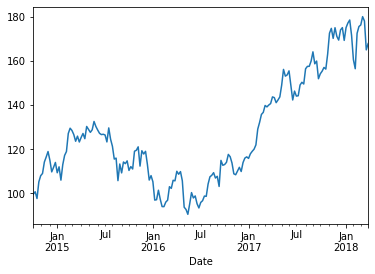

In [73]:
%matplotlib inline
df.Close.resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

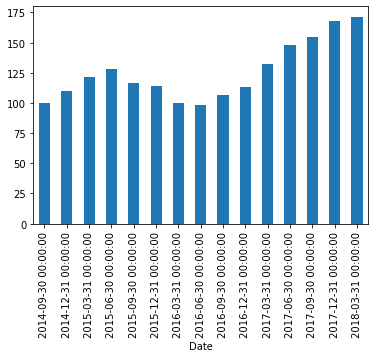

In [74]:
%matplotlib inline
df.Close.resample('Q').mean().plot(kind="bar")

<AxesSubplot:xlabel='Date'>

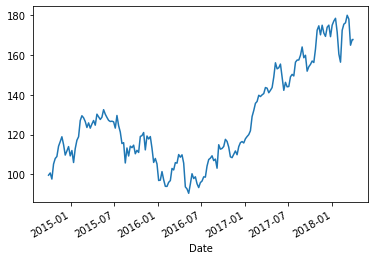

In [75]:
# normal closing price chart
df.Close.plot()

In [75]:

#head()
#tail()
#type()
#size
#describe()
#SIMPLY PLOT:
# from matplotlib import pyplot
# pyplot.plot(nifty)
#pyplot.show()

In [77]:

import pandas as pd

data = pd.read_csv("stock_data.csv", index_col=0, parse_dates=True)

data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


<IPython.core.display.Javascript object>


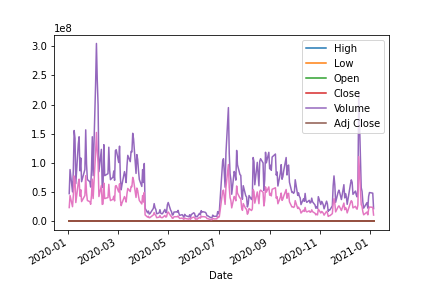

<AxesSubplot:xlabel='Date'>

In [78]:
#How to visualize data with Matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

data.plot()

<IPython.core.display.Javascript object>


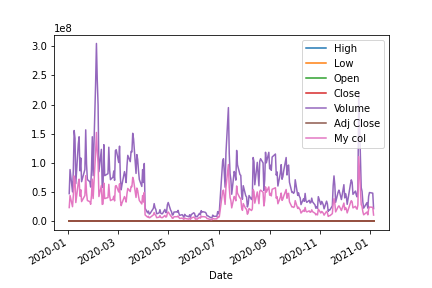

<AxesSubplot:xlabel='Date'>

In [79]:
#Matplotlib has a functional and object oriented interface
data['My col'] = data['Volume']*0.5
data['My col'].plot()
data.plot()

<IPython.core.display.Javascript object>


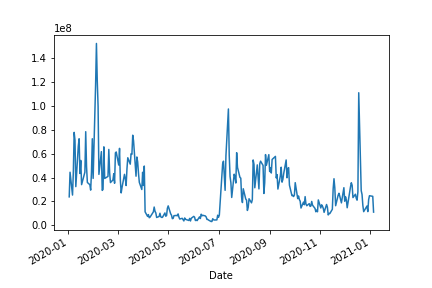

<AxesSubplot:xlabel='Date'>

In [80]:
#How to make a new figure
fig1, ax1 = plt.subplots()
data['My col'].plot(ax=ax1)

<IPython.core.display.Javascript object>


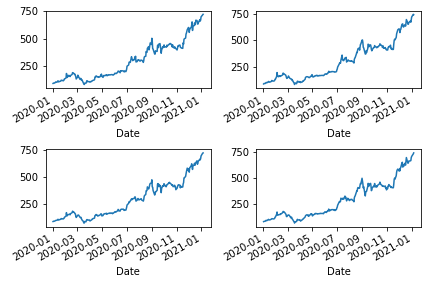

In [81]:
#Make multiple plots in one figure
fig2, ax2 = plt.subplots(2, 2)

data['Open'].plot(ax=ax2[0, 0])
data['High'].plot(ax=ax2[0, 1])
data['Low'].plot(ax=ax2[1, 0])
data['Close'].plot(ax=ax2[1, 1])
plt.tight_layout()

<IPython.core.display.Javascript object>


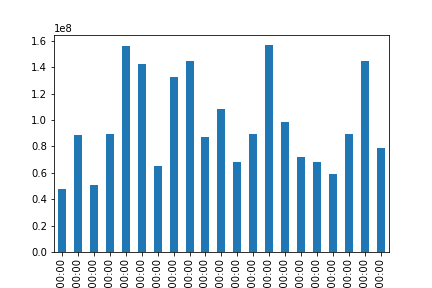

<AxesSubplot:xlabel='Date'>

In [82]:
#Make a histogram
fig3, ax3 = plt.subplots()

data.loc[:'2020-01-31', 'Volume'].plot.bar(ax=ax3)

In [83]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
shampoo=pd.read_csv('shampoo')
shampoo.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [85]:
type(shampoo)

pandas.core.frame.DataFrame

In [86]:
shampoo=pd.read_csv('shampoo',index_col=[0],parse_dates=True,squeeze=True)
type(shampoo)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Month'>

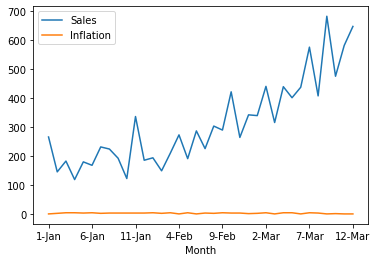

In [87]:
shampoo.plot()

In [89]:
shampoo.size

72

In [12]:
shampoo.describe()

,Sales,Inflation
count,36.000000,36.000000
mean,312.600000,3.388889
std,148.937164,1.535816
min,119.300000,1.000000
25%,192.450000,2.000000
50%,280.150000,4.000000
75%,411.100000,5.000000
max,682.000000,5.000000


In [90]:
#moving average
shampoo_ma=shampoo.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

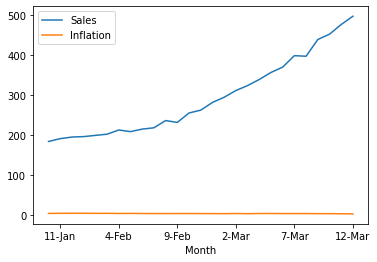

In [91]:
#Inflation refers to a general rise in the level of prices.
#Its opposite is deflation, a general fall in the price level. ...
#Inflation is when everything gets more expensive.
shampoo_ma.plot()